# card_spending

In [111]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

In [112]:
matplotlib.rc('axes', unicode_minus = False)
matplotlib.rc('font', family = 'Malgun Gothic')

In [113]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/Myung-jin/21aibigdata/f_bigdata/000_Card_Spending.csv", parse_dates = ["사용일자"])
df.head(30)

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드
0,2018-04-01,종로구,상계2동,종로구 상계2동,자동차정비,여성,42,3,56,82
1,2018-04-01,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61
2,2018-04-01,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140
3,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104
4,2018-04-01,종로구,중계4동,종로구 중계4동,음료식품,여성,38,2,57,103
5,2018-04-01,노원구,평창동,노원구 평창동,유통업,남성,61,2,51,145
6,2018-04-01,노원구,공릉2동,노원구 공릉2동,음료식품,남성,69,4,58,106
7,2018-04-01,종로구,"상계6,7동","종로구 상계6,7동",서적문구,여성,67,3,57,121
8,2018-04-01,종로구,창신2동,종로구 창신2동,수리서비스,남성,37,4,58,19
9,2018-04-01,종로구,혜화동,종로구 혜화동,요식업소,여성,46,2,51,178


In [114]:
df.shape

(187522, 10)

#### 지역 - 소비처 매칭 및 주소 수정

In [115]:
df.loc[df["소비처"] == "창신2동", "지역"] = "종로구"
df.loc[df["소비처"] == "상계2동", "지역"] = "노원구"
df.loc[df["소비처"] == "중계4동", "지역"] = "노원구"
df.loc[df["소비처"] == "평창동", "지역"] = "종로구"
df.loc[df["소비처"] == "상계6,7동", "지역"] = "노원구"
df.loc[df["소비처"] == "청운효자동", "지역"] = "종로구"
df.loc[df["소비처"] == "상계10동", "지역"] = "노원구"
df.loc[df["소비처"] == "종로5,6가동", "지역"] = "종로구"
df.loc[df["소비처"] == "상계9동", "지역"] = "노원구"
df.loc[df["소비처"] == "공릉2동", "지역"] = "노원구"
df.loc[df["소비처"] == "공릉1동", "지역"] = "노원구"
df.loc[df["소비처"] == "상계5동", "지역"] = "노원구"
df.loc[df["소비처"] == "하계1동", "지역"] = "노원구"

In [116]:
df.loc[df["소비처"] == "사직동", "지역"] = "종로구"
df.loc[df["소비처"] == "교남동", "지역"] = "종로구"
df.loc[df["소비처"] == "상계8동", "지역"] = "노원구"
df.loc[df["소비처"] == "혜화동", "지역"] = "종로구"
df.loc[df["소비처"] == "부암동", "지역"] = "종로구"
df.loc[df["소비처"] == "하계2동", "지역"] = "노원구"

df.loc[df["소비처"] == "중계2,3동", "지역"] = "노원구"
df.loc[df["소비처"] == "삼청동", "지역"] = "종로구"
df.loc[df["소비처"] == "창신3동", "지역"] = "종로구"
df.loc[df["소비처"] == "중계1동", "지역"] = "노원구"
df.loc[df["소비처"] == "무악동", "지역"] = "종로구"
df.loc[df["소비처"] == "상계3,4동", "지역"] = "노원구"
df.loc[df["소비처"] == "중계본동", "지역"] = "노원구"
df.loc[df["소비처"] == "종로1,2,3,4가동", "지역"] = "종로구"

In [117]:
df["주소"] = df["지역"] + " " + df["소비처"]

In [118]:
df["주소"].unique()

array(['노원구 상계2동', '종로구 혜화동', '노원구 상계6,7동', '종로구 종로5,6가동', '노원구 중계4동',
       '종로구 평창동', '노원구 공릉2동', '종로구 창신2동', '노원구 상계8동', '종로구 청운효자동',
       '종로구 사직동', '노원구 하계1동', '노원구 상계10동', '종로구 삼청동', '노원구 상계9동',
       '노원구 중계본동', '노원구 공릉1동', '노원구 상계5동', '종로구 무악동', '종로구 종로1,2,3,4가동',
       '노원구 중계2,3동', '종로구 교남동', '노원구 중계1동', '종로구 부암동', '노원구 하계2동',
       '종로구 창신3동', '노원구 상계3,4동'], dtype=object)

In [119]:
df[(df["지역"] + " " + df["소비처"]) != df["주소"]]

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드


#### 파생변수 연령대 추가

In [120]:
#df["연령대"] = (df["연령"] - (df["연령"]%10))

In [121]:
def input(age):
    a = ''
    if age<=29:
        a= '청년'
    elif age<=49:
        a = '중년'
    elif age<=64:
        a = '장년'
    else : a = '노년'
    return a

In [122]:
df['연령대'] = df['연령'].apply(lambda x : input(x))

In [123]:
df[df['연령대']=='청년']

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대
26,2018-04-01,종로구,청운효자동,종로구 청운효자동,보건위생,여성,22,3,56,155,청년
32,2018-04-01,노원구,상계2동,노원구 상계2동,유통업,여성,25,46,133,218,청년
34,2018-04-01,노원구,상계2동,노원구 상계2동,의료기관,남성,26,53,198,100,청년
36,2018-04-01,노원구,하계1동,노원구 하계1동,의료기관,여성,26,42,179,50,청년
47,2018-04-01,노원구,"중계2,3동","노원구 중계2,3동",의복,남성,28,35,191,139,청년
...,...,...,...,...,...,...,...,...,...,...,...
187482,2019-02-28,노원구,상계5동,노원구 상계5동,보건위생,남성,20,9,86,202,청년
187498,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",보건위생,남성,25,23,408,206,청년
187505,2019-02-28,노원구,상계8동,노원구 상계8동,레저업소,남성,25,18,118,211,청년
187509,2019-02-28,노원구,상계8동,노원구 상계8동,요식업소,여성,25,41,309,34,청년


## 특이점(이상치 제거)

##### 중복 여부

In [124]:
df.duplicated().sum()

0

##### 사용횟수 0보다 작은 거 삭제

In [125]:
idx = df[df['사용횟수']<= 0].index
df = df.drop(idx)

In [126]:
df.shape # 187522개에서 80개 제거

(187442, 11)

##### 이상치 제거 - 사용횟수

In [127]:
df.describe()

,연령,사용횟수,사용금액,사용카드
count,187442.000000,187442.000000,1.874420e+05,187442.000000
mean,45.270468,82.425118,1.703130e+03,140.572092
std,16.043203,287.457857,1.093429e+04,72.354464
min,20.000000,1.000000,2.000000e+00,0.000000
25%,32.000000,9.000000,9.000000e+01,94.000000
50%,45.000000,24.000000,1.530000e+02,158.000000
75%,56.000000,53.000000,6.830000e+02,206.000000
max,105.000000,20082.000000,2.210348e+06,263.000000


In [128]:
df[df["사용횟수"]>(53+(1.5*(53-9)))]
# box plot 이상치 기준으로 20000개가 넘음 -> 적절 X

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대
200,2018-04-01,종로구,청운효자동,종로구 청운효자동,자동차정비,남성,30,197,717,167,중년
202,2018-04-01,종로구,청운효자동,종로구 청운효자동,요식업소,여성,35,175,3714,157,중년
204,2018-04-01,종로구,사직동,종로구 사직동,문화취미,여성,25,149,1709,44,청년
205,2018-04-01,종로구,사직동,종로구 사직동,유통업,여성,20,600,5210,215,청년
208,2018-04-01,종로구,사직동,종로구 사직동,자동차정비,남성,55,123,735,168,장년
...,...,...,...,...,...,...,...,...,...,...,...
187497,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",의료기관,남성,60,366,15916,2,장년
187500,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",요식업소,여성,30,796,8621,208,중년
187501,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",요식업소,여성,40,610,8918,161,중년
187512,2019-02-28,노원구,상계9동,노원구 상계9동,유통업,여성,65,176,3485,214,노년


In [129]:
df[df["사용횟수"]> 3*287.457857]
# 3*표준편차 기준으로 2551개 -> 사용

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대
231,2018-04-01,종로구,평창동,종로구 평창동,서적문구,여성,25,1862,41070,93,청년
232,2018-04-01,종로구,평창동,종로구 평창동,서적문구,남성,35,1069,27643,94,중년
253,2018-04-01,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",유통업,여성,25,1840,53495,220,청년
260,2018-04-01,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",요식업소,여성,55,959,21920,159,장년
261,2018-04-01,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",요식업소,남성,40,1695,47904,160,중년
...,...,...,...,...,...,...,...,...,...,...,...
187279,2019-02-28,노원구,상계2동,노원구 상계2동,요식업소,남성,30,967,14861,134,중년
187445,2019-02-28,노원구,상계2동,노원구 상계2동,유통업,여성,55,940,32218,215,장년
187457,2019-02-28,노원구,상계2동,노원구 상계2동,요식업소,남성,25,1871,47288,37,청년
187488,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",연료판매,여성,45,20082,1586069,173,중년


In [130]:
idx = df[df["사용횟수"]> 3*287.457857].index
df = df.drop(idx)
df.shape #187442에서 2551개 제거

(184891, 11)

In [135]:
df

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,중년
1,2018-04-01,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61,중년
2,2018-04-01,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140,장년
3,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104,중년
4,2018-04-01,노원구,중계4동,노원구 중계4동,음료식품,여성,38,2,57,103,중년
...,...,...,...,...,...,...,...,...,...,...,...
187517,2019-02-28,노원구,상계10동,노원구 상계10동,서적문구,여성,30,5,56,212,중년
187518,2019-02-28,노원구,상계10동,노원구 상계10동,의료기관,남성,60,5,80,4,장년
187519,2019-02-28,노원구,상계10동,노원구 상계10동,요식업소,여성,60,9,246,163,장년
187520,2019-02-28,노원구,상계10동,노원구 상계10동,요식업소,남성,55,18,203,164,장년


In [136]:
df.to_csv("new_card_spending.csv", index = False)

##### 이상치 제거 - 사용금액

In [107]:
df[df["사용금액"]>(683+(1.5*(683-9)))]
# box plot 이상치 기준으로 20000개가 넘음 -> 적절 X

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대
202,2018-04-01,종로구,청운효자동,종로구 청운효자동,요식업소,여성,35,175,3714,157,중년
204,2018-04-01,종로구,사직동,종로구 사직동,문화취미,여성,25,149,1709,44,청년
205,2018-04-01,종로구,사직동,종로구 사직동,유통업,여성,20,600,5210,215,청년
218,2018-04-01,종로구,삼청동,종로구 삼청동,요식업소,여성,40,425,8379,158,중년
219,2018-04-01,종로구,삼청동,종로구 삼청동,요식업소,남성,55,201,5118,159,장년
...,...,...,...,...,...,...,...,...,...,...,...
187500,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",요식업소,여성,30,796,8621,208,중년
187501,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",요식업소,여성,40,610,8918,161,중년
187503,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",음료식품,남성,40,77,1976,22,중년
187512,2019-02-28,노원구,상계9동,노원구 상계9동,유통업,여성,65,176,3485,214,노년


In [132]:
df[df["사용금액"]>3*10934.29]
# 3*표준편차 기준으로 461개 -> 사용

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대
819,2018-04-02,노원구,상계2동,노원구 상계2동,의료기관,남성,55,692,73590,1,장년
1374,2018-04-03,노원구,상계2동,노원구 상계2동,의료기관,남성,55,736,82507,5,장년
2920,2018-04-06,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",신변잡화,남성,40,39,47663,97,중년
4582,2018-04-09,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",유통업,여성,55,692,60617,219,장년
4590,2018-04-09,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",의료기관,남성,50,512,2210348,96,장년
...,...,...,...,...,...,...,...,...,...,...,...
185539,2019-02-25,노원구,상계2동,노원구 상계2동,의료기관,여성,35,845,85366,107,중년
186078,2019-02-26,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",의료기관,남성,50,438,96424,1,장년
186154,2019-02-26,종로구,평창동,종로구 평창동,의료기관,여성,35,32,235186,8,중년
186663,2019-02-27,노원구,상계2동,노원구 상계2동,의료기관,남성,50,655,73223,4,장년


In [133]:
idx = df[df["사용금액"]> 3*10934.29].index
df = df.drop(idx)
df.shape #184891에서 461개 제거

(184430, 11)

### 2. 지역 - 사용금액 연관관계

#### 정상 범위 분포

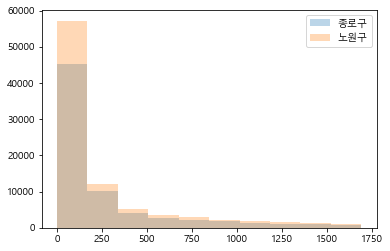

In [10]:
plt.hist(df[df["지역"]=="종로구"]["사용금액"], label = "종로구", range = (0, 1691.5), alpha = 0.3)
plt.hist(df[df["지역"]=="노원구"]["사용금액"], label = "노원구", range = (0, 1691.5), alpha = 0.3)
plt.legend()

#### 이상치 분포

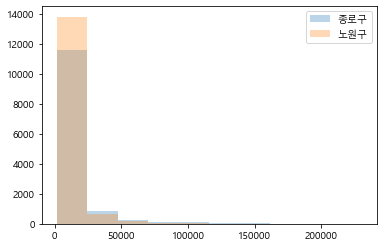

In [11]:
plt.hist(df[df["지역"]=="종로구"]["사용금액"], label = "종로구", range = (1691.5, 230000), alpha = 0.3)
plt.hist(df[df["지역"]=="노원구"]["사용금액"], label = "노원구", range = (1691.5, 230000), alpha = 0.3)
plt.legend()

/////////////////

<AxesSubplot:>

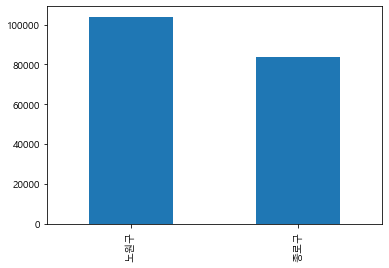

In [12]:
df_count = df["지역"].value_counts()
df_count.plot.bar()

<AxesSubplot:xlabel='지역'>

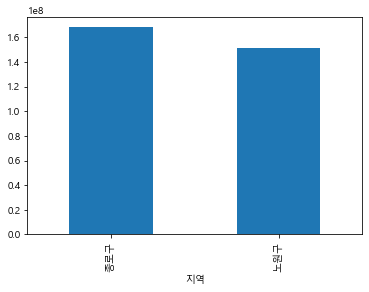

In [13]:
g = df.groupby(['지역'])['사용금액'].sum().sort_values(ascending=False)
g.plot(kind = 'bar')

#### 연령대 추가

<AxesSubplot:xlabel='연령대'>

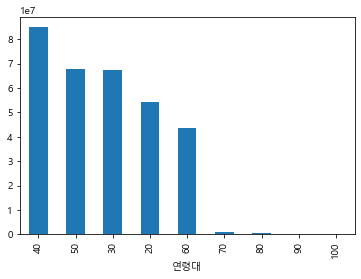

In [15]:
g = df.groupby(['연령대'])['사용금액'].sum().sort_values(ascending=False)
g.plot(kind = 'bar')

In [16]:
df[df["연령대"]==100]

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대
16267,2018-04-30,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",요식업소,남성,102,4,54,26,100
67790,2018-07-30,노원구,상계5동,노원구 상계5동,음료식품,여성,105,3,59,236,100
117856,2018-10-27,노원구,중계1동,노원구 중계1동,유통업,남성,104,3,58,204,100


In [18]:
df.describe()

,연령,사용횟수,사용금액,사용카드,연령대
count,187522.000000,187522.000000,1.875220e+05,187522.000000,187522.000000
mean,45.271339,82.389949,1.702427e+03,140.570280,41.965743
std,16.042389,287.401575,1.093201e+04,72.357502,15.802573
min,20.000000,-1.000000,2.000000e+00,0.000000,20.000000
25%,32.000000,9.000000,9.000000e+01,94.000000,30.000000
50%,45.000000,24.000000,1.530000e+02,158.000000,40.000000
75%,56.000000,53.000000,6.820000e+02,206.000000,50.000000
max,105.000000,20082.000000,2.210348e+06,263.000000,100.000000


In [26]:
df[df['연령대']==90]

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대
150,2018-04-01,노원구,중계본동,노원구 중계본동,유통업,여성,94,35,220,212,90
549,2018-04-02,노원구,중계본동,노원구 중계본동,유통업,남성,93,64,145,212,90
596,2018-04-02,종로구,"종로5,6가동","종로구 종로5,6가동",의료기관,여성,92,29,105,165,90
663,2018-04-02,노원구,"상계6,7동","노원구 상계6,7동",광학제품,여성,91,38,117,235,90
683,2018-04-02,노원구,상계5동,노원구 상계5동,의료기관,여성,90,69,70,222,90
...,...,...,...,...,...,...,...,...,...,...,...
186997,2019-02-28,노원구,하계1동,노원구 하계1동,음료식품,여성,91,19,46,52,90
186998,2019-02-28,종로구,청운효자동,종로구 청운효자동,자동차정비,남성,90,59,68,151,90
187001,2019-02-28,종로구,"종로5,6가동","종로구 종로5,6가동",요식업소,남성,93,23,97,110,90
187034,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",자동차정비,여성,92,48,186,151,90


In [31]:
df_a = df[df['연령대']>=70]
df_a["사용금액"].max()

265

In [ ]:
df[df['연령대']<80]

#### 사용금액 이상치

In [25]:
df_a = df[df["사용금액"]> 3*10932.01]

In [24]:
df_a["사용금액"]

231         41070
253         53495
261         47904
332         47311
427         93668
           ...   
187276      53623
187457      47288
187488    1586069
187489     886578
187495      33240
Name: 사용금액, Length: 1555, dtype: int64

In [23]:
df_a["사용금액"].min()

32799

In [21]:
df[df["사용횟수"]> 3*287.401575]

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대
231,2018-04-01,종로구,평창동,종로구 평창동,서적문구,여성,25,1862,41070,93,20
232,2018-04-01,종로구,평창동,종로구 평창동,서적문구,남성,35,1069,27643,94,30
253,2018-04-01,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",유통업,여성,25,1840,53495,220,20
260,2018-04-01,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",요식업소,여성,55,959,21920,159,50
261,2018-04-01,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",요식업소,남성,40,1695,47904,160,40
...,...,...,...,...,...,...,...,...,...,...,...
187279,2019-02-28,노원구,상계2동,노원구 상계2동,요식업소,남성,30,967,14861,134,30
187445,2019-02-28,노원구,상계2동,노원구 상계2동,유통업,여성,55,940,32218,215,50
187457,2019-02-28,노원구,상계2동,노원구 상계2동,요식업소,남성,25,1871,47288,37,20
187488,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",연료판매,여성,45,20082,1586069,173,40


<AxesSubplot:>

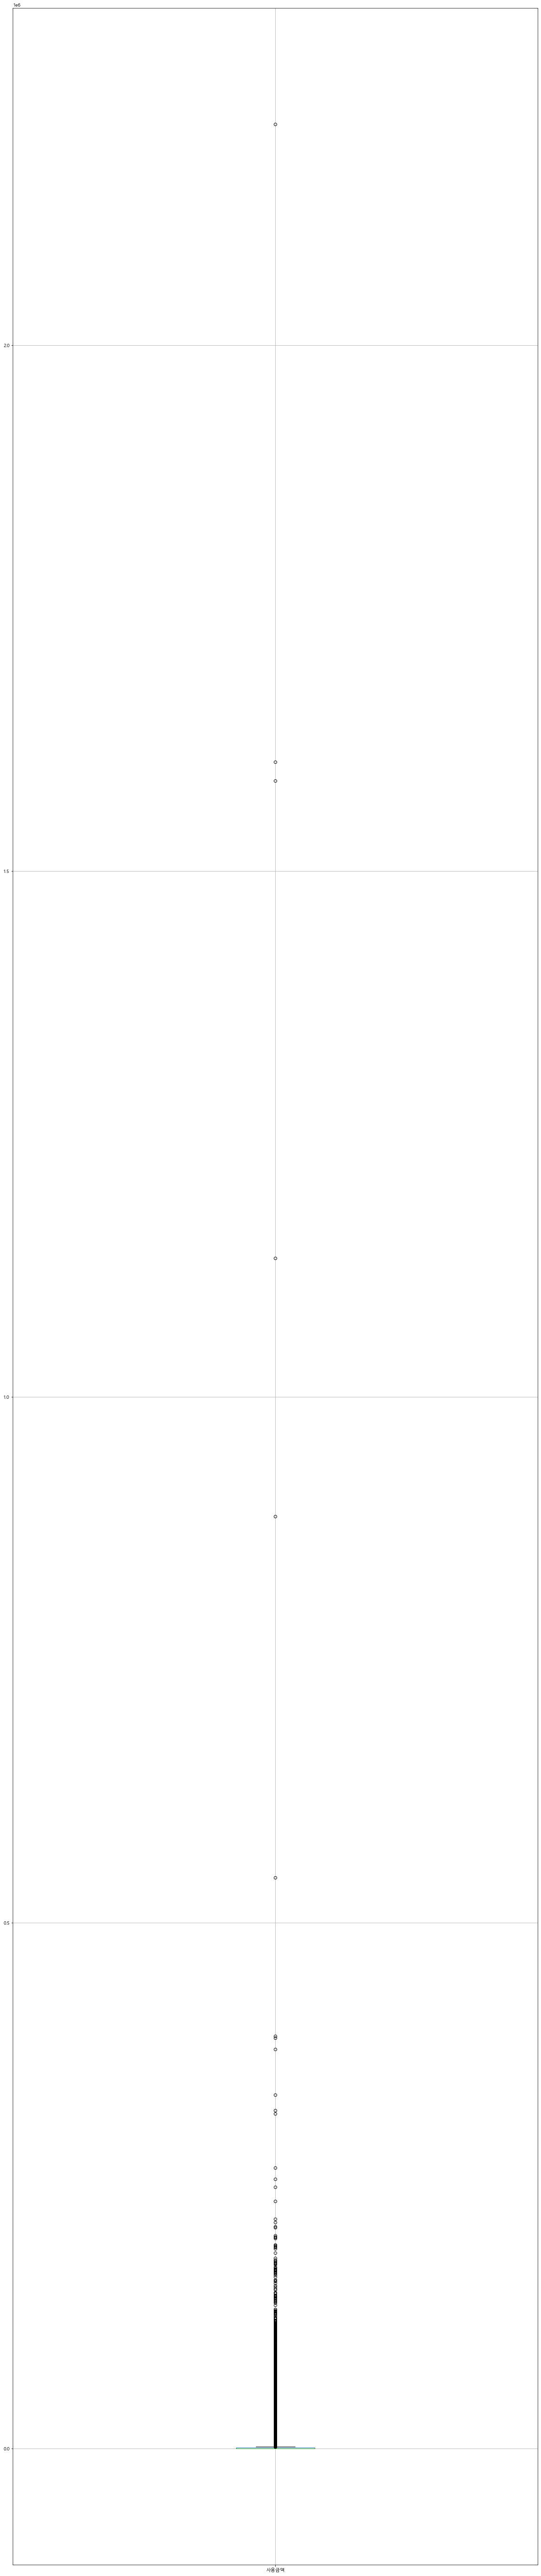

In [30]:
df[['사용금액']].boxplot(figsize = (20, 100))

In [110]:
df[df["사용금액"]> (682+(1.5*(682-9)))]

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대
202,2018-04-01,종로구,청운효자동,종로구 청운효자동,요식업소,여성,35,175,3714,157,30
204,2018-04-01,종로구,사직동,종로구 사직동,문화취미,여성,25,149,1709,44,20
205,2018-04-01,종로구,사직동,종로구 사직동,유통업,여성,20,600,5210,215,20
218,2018-04-01,종로구,삼청동,종로구 삼청동,요식업소,여성,40,425,8379,158,40
219,2018-04-01,종로구,삼청동,종로구 삼청동,요식업소,남성,55,201,5118,159,50
...,...,...,...,...,...,...,...,...,...,...,...
187500,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",요식업소,여성,30,796,8621,208,30
187501,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",요식업소,여성,40,610,8918,161,40
187503,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",음료식품,남성,40,77,1976,22,40
187512,2019-02-28,노원구,상계9동,노원구 상계9동,유통업,여성,65,176,3485,214,60


#### ???? 해석 어떻게 함 ????

In [104]:
df[df['사용횟수']==20082]

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대
187488,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",연료판매,여성,45,20082,1586069,173,40


In [89]:
df[df['사용금액']==2210348]

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드
4590,2018-04-09,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",의료기관,남성,50,512,2210348,96


#### 사용금액 이상치

In [37]:
df_money = df[df['사용금액']>1691.5]
df_money

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,이익,연령대
202,2018-04-01,종로구,청운효자동,종로구 청운효자동,요식업소,여성,35,175,3714,157,1,30
204,2018-04-01,종로구,사직동,종로구 사직동,문화취미,여성,25,149,1709,44,1,20
205,2018-04-01,종로구,사직동,종로구 사직동,유통업,여성,20,600,5210,215,1,20
218,2018-04-01,종로구,삼청동,종로구 삼청동,요식업소,여성,40,425,8379,158,1,40
219,2018-04-01,종로구,삼청동,종로구 삼청동,요식업소,남성,55,201,5118,159,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...
187500,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",요식업소,여성,30,796,8621,208,1,30
187501,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",요식업소,여성,40,610,8918,161,1,40
187503,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",음료식품,남성,40,77,1976,22,1,40
187512,2019-02-28,노원구,상계9동,노원구 상계9동,유통업,여성,65,176,3485,214,1,60


In [36]:
df_money[df_money['사용금액']<10000]

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,이익,연령대
202,2018-04-01,종로구,청운효자동,종로구 청운효자동,요식업소,여성,35,175,3714,157,1,30
204,2018-04-01,종로구,사직동,종로구 사직동,문화취미,여성,25,149,1709,44,1,20
205,2018-04-01,종로구,사직동,종로구 사직동,유통업,여성,20,600,5210,215,1,20
218,2018-04-01,종로구,삼청동,종로구 삼청동,요식업소,여성,40,425,8379,158,1,40
219,2018-04-01,종로구,삼청동,종로구 삼청동,요식업소,남성,55,201,5118,159,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...
187500,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",요식업소,여성,30,796,8621,208,1,30
187501,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",요식업소,여성,40,610,8918,161,1,40
187503,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",음료식품,남성,40,77,1976,22,1,40
187512,2019-02-28,노원구,상계9동,노원구 상계9동,유통업,여성,65,176,3485,214,1,60


In [38]:
df[df['사용횟수']>119]

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,이익,연령대
200,2018-04-01,종로구,청운효자동,종로구 청운효자동,자동차정비,남성,30,197,717,167,1,30
202,2018-04-01,종로구,청운효자동,종로구 청운효자동,요식업소,여성,35,175,3714,157,1,30
204,2018-04-01,종로구,사직동,종로구 사직동,문화취미,여성,25,149,1709,44,1,20
205,2018-04-01,종로구,사직동,종로구 사직동,유통업,여성,20,600,5210,215,1,20
208,2018-04-01,종로구,사직동,종로구 사직동,자동차정비,남성,55,123,735,168,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...
187497,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",의료기관,남성,60,366,15916,2,1,60
187500,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",요식업소,여성,30,796,8621,208,1,30
187501,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",요식업소,여성,40,610,8918,161,1,40
187512,2019-02-28,노원구,상계9동,노원구 상계9동,유통업,여성,65,176,3485,214,1,60


In [ ]:
## 저 백신 월~수 맞으러갈게여..... (탈출)